# TRIP & TRAVEL CUSTOMER RECOMMENDATIONS MODEL

![App Platorm](https://holidayturn.com/wp-content/uploads/2017/09/International-travel.jpg)

## Problem Given:
"Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

## Dataset Feature Descriptions:
* `CustomerID`               : Unique customer ID
* `ProdTaken`                : Whether or not the customer bought a product
* `Age`                      : Customer age
* `TypeofContact`            : How was the customer contacted
* `CityTier`                 : City tier depends on the development of a city, population, facilities, and living standards
* `DurationOfPitch`          : Duration of the pitch by a salesperson to the customer
* `Occupation`               : Occupation of customer
* `Gender`                   : Gender of customer
* `NumberOfPersonVisiting`   : Total number of persons planning to take the trip with the customer
* `NumberOfFollowups`        : Total number of follow-ups has been done by the salesperson after the sales pitch
* `ProductPitched`           : Product pitched by the salesperson
* `PreferredPropertyStar`    : Preferred hotel property rating by customer
* `MaritalStatus`            : Marital status of customer
* `NumberOfTrips`            : Average number of trips in a year by customer
* `Passport`                 : If customer has passport or not
* `PitchSatisfactionScore`   : Sales pitch satisfaction score
* `OwnCar`                   : Does the customer own a car
* `NumberOfChildrenVisiting` : Number of children traveling with the customer
* `Designation`              : Designation of the customer in the current organization
* `MonthlyIncome`            : Gross monthly income of the customer

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load & Describe Data

## Load Data

In [5]:
url = 'https://raw.githubusercontent.com/sulthonamar/DataPreprocessing/main/Travel.csv'
df = pd.read_csv(url)

In [6]:
df.sample(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
1738,201738,0,45.0,Self Enquiry,1,26.0,Small Business,Male,3,3.0,Super Deluxe,3.0,Married,1.0,1,3,1,1.0,AVP,28496.0
4652,204652,0,40.0,Self Enquiry,1,7.0,Salaried,Female,4,5.0,Super Deluxe,3.0,Married,3.0,0,3,1,1.0,AVP,31420.0
3180,203180,0,49.0,Self Enquiry,1,11.0,Salaried,Male,4,5.0,Standard,3.0,Single,2.0,0,5,1,2.0,Senior Manager,29677.0
1668,201668,0,38.0,Self Enquiry,1,8.0,Salaried,Male,2,3.0,Deluxe,3.0,Married,1.0,0,1,1,1.0,Manager,21553.0
4002,204002,0,31.0,Self Enquiry,1,9.0,Salaried,Male,5,5.0,Deluxe,3.0,Married,3.0,0,4,1,2.0,Manager,22830.0


## Describe Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

Dari fungsi `.info()` diketahui:
- Terdapat 20 Fitur atau kolom dengan 4888 baris data
- Beberapa fitur memiliki ***Missing Value*** diantaranya: `Age`, `TypeofContact`, `DurationOfPitch`, `NumberOfFollowups`, `PreferredPropertyStar`, `NumberOfTrips`, `NumberOfChildrenVisiting`, dan `MonthlyIncome`
- Tipe data pada beberapa fitur belum merepresentasikan nilai dari fitur tersebut, seperti: `CityTier` yang merupakan data kategorik namun sudah direpresentasikan menggunakan angka (***int***)

# Exploratory Data Analysis

## Pendekatan Numerik

Data dipisahkan menjadi 5 kelompok yaitu:
- Data Numerik - Continous
- Data Numerik - Diskrit
- Data Kategorik - Ordinal
- Data Kategotrik - Nominal
- Data Target

In [8]:
dnum_col = ['NumberOfPersonVisiting','NumberOfFollowups','NumberOfTrips','PitchSatisfactionScore','NumberOfChildrenVisiting',]

#continuous numerical columns
cnum_col = ['Age','DurationOfPitch','MonthlyIncome']

#list of categorical columns
ncat_col = ['CustomerID','Occupation','Gender','TypeofContact', 'MaritalStatus','Passport','OwnCar']

ocat_col = ['ProductPitched','CityTier','PreferredPropertyStar','Designation']

#target column
target_col = ['ProdTaken']

In [9]:
nums = dnum_col + cnum_col
cats = ncat_col + ocat_col

#### Deskripsi Statistik Fitur Numerik

In [10]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.0,3.0,4.0,5.0
NumberOfChildrenVisiting,4822.0,1.187267,0.857861,0.0,1.0,1.0,2.0,3.0
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
MonthlyIncome,4655.0,23619.853491,5380.698361,1000.0,20346.0,22347.0,25571.0,98678.0


In [11]:
df['NumberOfPersonVisiting'].unique()

array([3, 2, 1, 4, 5])

#### Deksripsi Statistik Fitur Kategori

In [12]:
df_cat = df[cats].astype('str')
df_cat.describe().T

,count,unique,top,freq
CustomerID,4888,4888,200000,1
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
TypeofContact,4888,3,Self Enquiry,3444
MaritalStatus,4888,4,Married,2340
Passport,4888,2,0,3466
OwnCar,4888,2,1,3032
ProductPitched,4888,5,Basic,1842
CityTier,4888,3,1,3190
PreferredPropertyStar,4888,4,3.0,2993


In [13]:
for i in df[cats].columns:
    x = df[i].unique()
    print(f'{i}: {x}')
    print()

CustomerID: [200000 200001 200002 ... 204885 204886 204887]

Occupation: ['Salaried' 'Free Lancer' 'Small Business' 'Large Business']

Gender: ['Female' 'Male' 'Fe Male']

TypeofContact: ['Self Enquiry' 'Company Invited' nan]

MaritalStatus: ['Single' 'Divorced' 'Married' 'Unmarried']

Passport: [1 0]

OwnCar: [1 0]

ProductPitched: ['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King']

CityTier: [3 1 2]

PreferredPropertyStar: [ 3.  4.  5. nan]

Designation: ['Manager' 'Executive' 'Senior Manager' 'AVP' 'VP']



**Fitur Numerik**
- Semua Fitur Numerik yang bernilai ***Continous*** (`Age`, `DurationOfPitch`, `MonthlyIncome`) memiliki nilai **mean** yang lebih besar dari **median** sehingga ada indikasi data ***Skew***
- Semua fitur numerik yang bernilai ***Diskrit*** memiliki nilai **mean** yang lebih kecil dari **median** sehingga ada indikasi data ***Skew***

**Fitur Kategorik**
- Fitur `CustomerID` merupakan fitur **identifier** pada dataset sehingga semua nilainya ***unique***, dan diputuskan untuk ***Drop***
- Tidak perlu ada fitur lain yang dibuang atau didrop untuk fitur kategorik, karena nilai unik dari masing-masing kolom masih dalam batas wajar
- Dilihat dari nilai unique masing-masing fitur terdapat beberapa nilai yang janggal, diantaranya:

1. Fitur `Gender` memiliki nilai `['Female' 'Male' 'Fe Male']` sehingga nilai `Fe Male` dapat dikonversi menjadi `Female`
2. Fitur `MaritalStatus` memiliki nilai `['Single' 'Divorced' 'Married' 'Unmarried']` dimana `Unmarried` sama artinya dengan `Single`, sehingga bisa dikonversi ke salah satu nilai saja

Menghapus Kolom `CustomerID`

In [14]:
df.drop(columns = 'CustomerID', inplace=True)
ncat_col.remove('CustomerID')
nums = dnum_col + cnum_col
cats = ncat_col + ocat_col

Mengubah nilai `Fe Male` menjadi `Female`

In [15]:
df.replace('Fe Male','Female', inplace = True)

Mengubah nilai `Single` menjadi `Unmarried`

In [16]:
df.replace('Single', 'Unmarried', inplace = True)

## Pendekatan Grafis

### Univariate Analysis

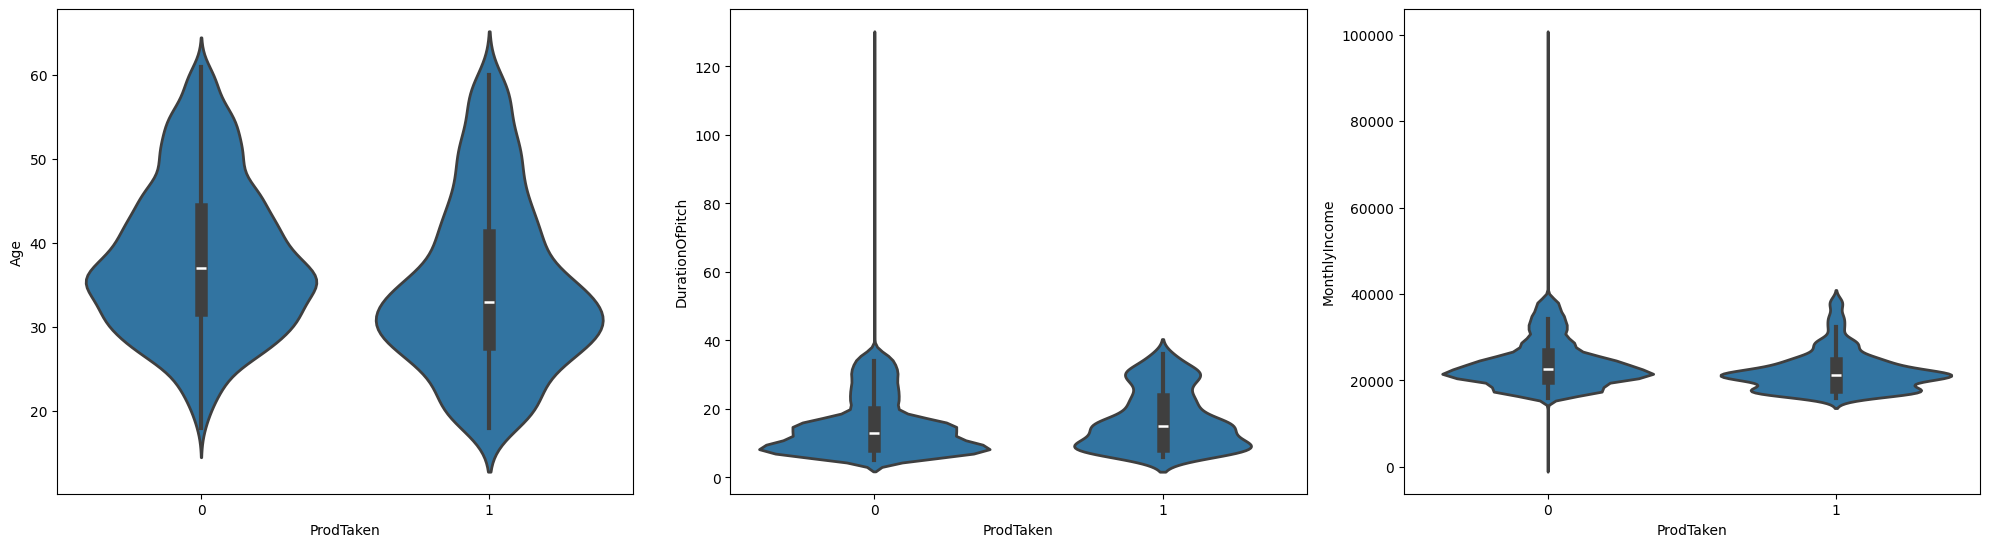

In [17]:
plt.figure(figsize=(20,16))
for i in range(0, len(cnum_col)):
    plt.subplot(3, 3, i+1)
    sns.violinplot(data=df, x='ProdTaken', y=cnum_col[i], orient='v', linewidth=2)
    plt.tight_layout()

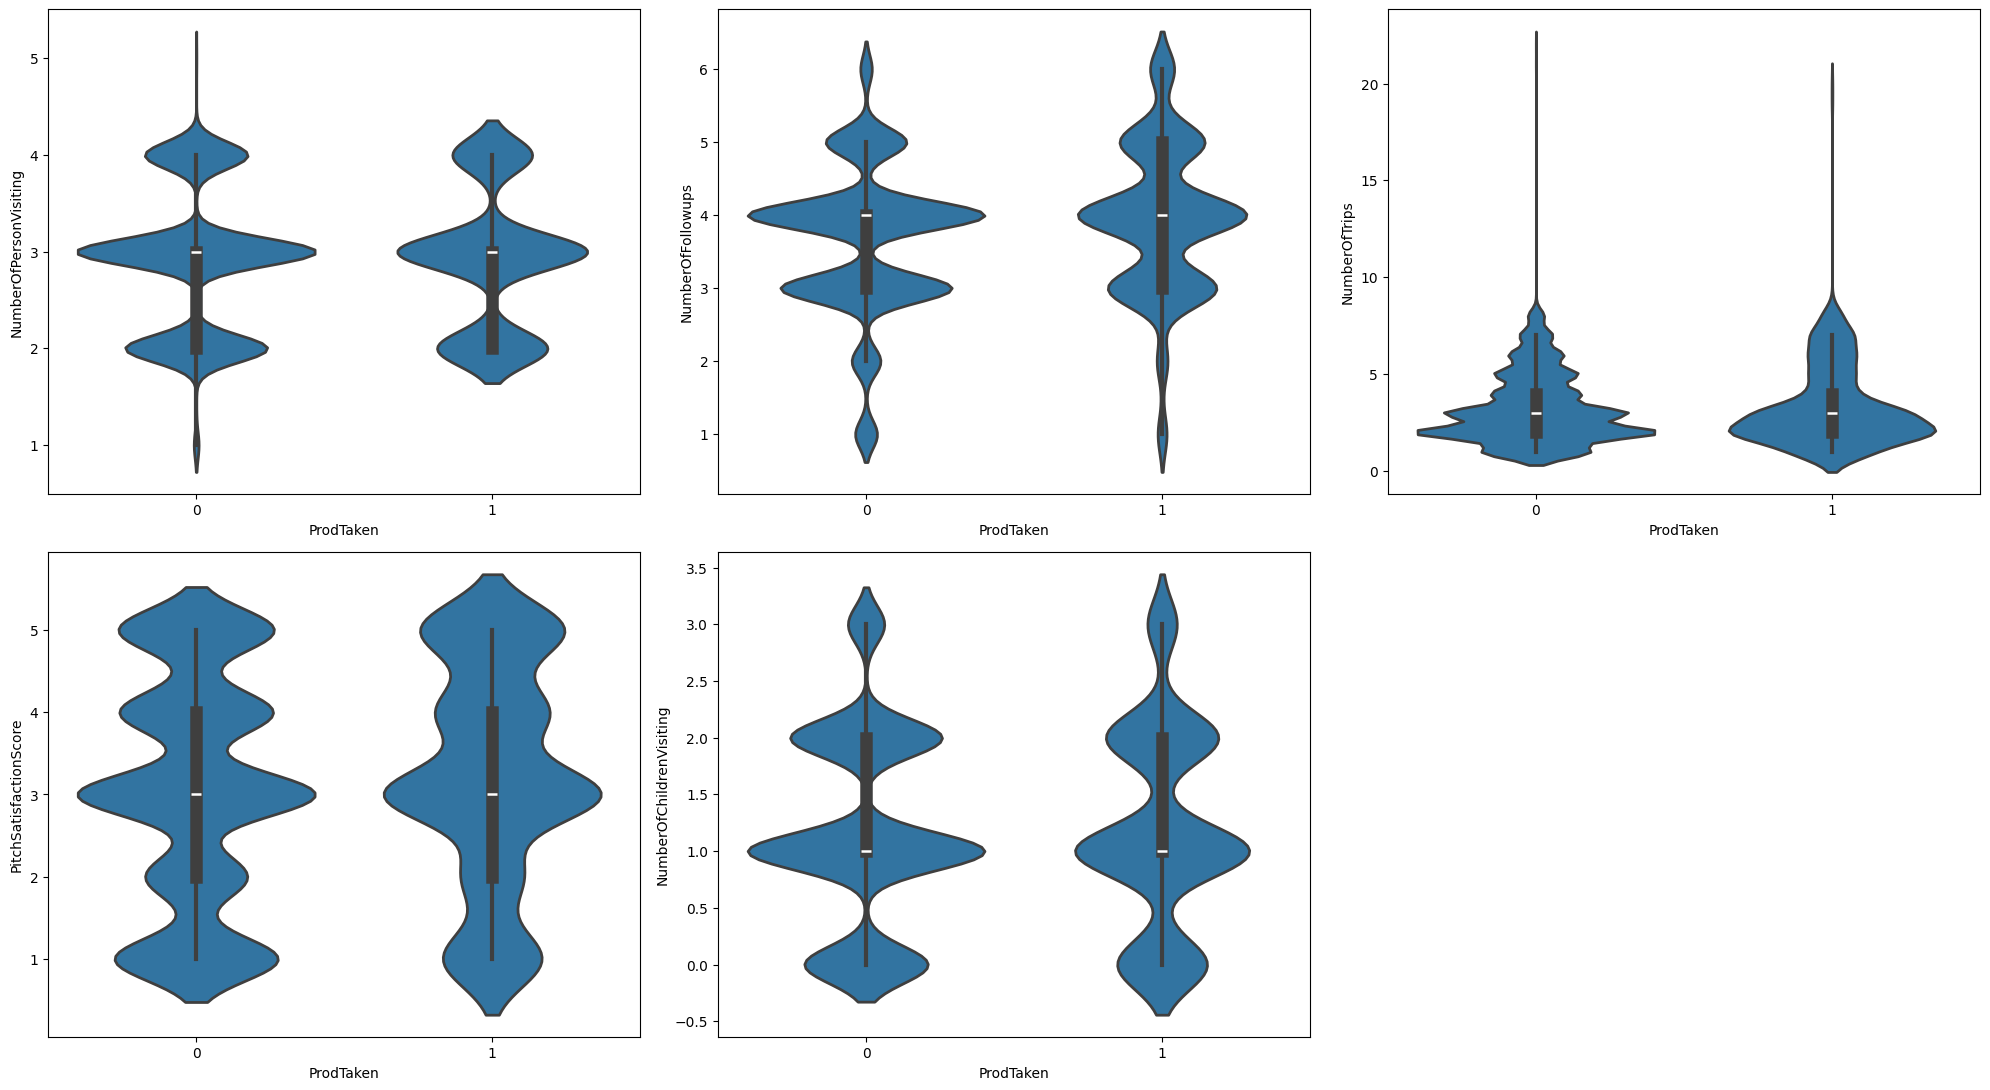

In [18]:
plt.figure(figsize=(20,16))
for i in range(0, len(dnum_col)):
    plt.subplot(3, 3, i+1)
    sns.violinplot(data=df, x='ProdTaken', y=dnum_col[i], orient='v', linewidth=2)
    plt.tight_layout()

### Multivariate Analysis

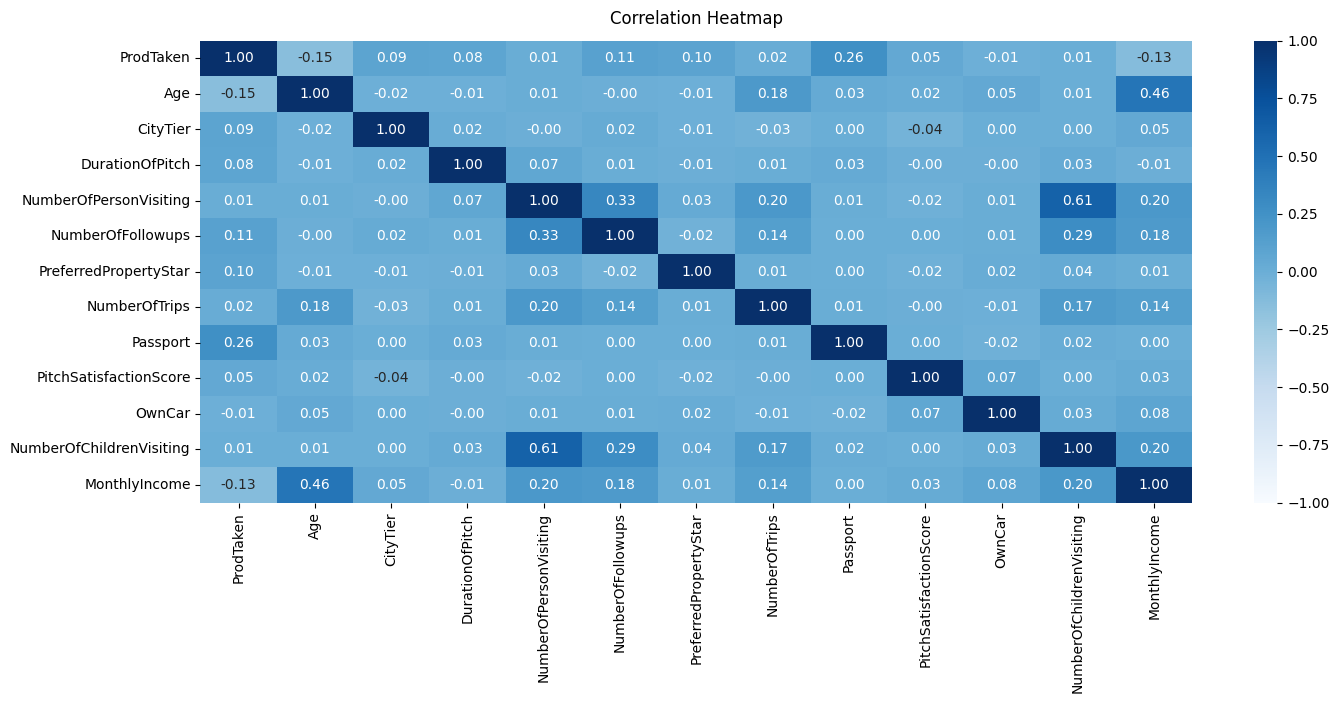

In [19]:
# Memilih hanya kolom numerik
numeric_df = df.select_dtypes(include=['number'])

# Menghitung korelasi
corr_matrix = numeric_df.corr()

# Membuat heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='Blues', fmt='.2f')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

# Data Preparation

##  1. Data Cleansing

### A. Handling Missing Value

In [20]:
#check null value
df.isna().sum()

,0
ProdTaken,0
Age,226
TypeofContact,25
CityTier,0
DurationOfPitch,251
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,45
ProductPitched,0


In [21]:
#mengisi nilai null
df.fillna(
    value = {
        'Age' : df.Age.mode()[0],
        'TypeofContact' : df.TypeofContact.mode()[0],
        'DurationOfPitch' : df.DurationOfPitch.median(),
        'NumberOfFollowups' : df.NumberOfFollowups.median(),
        'PreferredPropertyStar' : df.PreferredPropertyStar.median(),
        'NumberOfTrips' : df.NumberOfTrips.median(),
        'NumberOfChildrenVisiting' : df.NumberOfChildrenVisiting.median(),
        'MonthlyIncome' : df.MonthlyIncome.median()
    }, inplace=True)

df.isnull().sum()

,0
ProdTaken,0
Age,0
TypeofContact,0
CityTier,0
DurationOfPitch,0
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,0
ProductPitched,0


### B. Handling Duplicated Data

In [22]:
df.duplicated().sum()

141

In [23]:
print('The shape of data before removing duplicate')
print(df.shape)

df = df.drop_duplicates()
print('The shape of data after removing duplicate')
print(df.shape)

The shape of data before removing duplicate
(4888, 19)
The shape of data after removing duplicate
(4747, 19)


### C. Handling Ouliers

In [24]:
outliers = ['DurationOfPitch', 'MonthlyIncome', 'NumberOfTrips']

<Axes: ylabel='DurationOfPitch'>

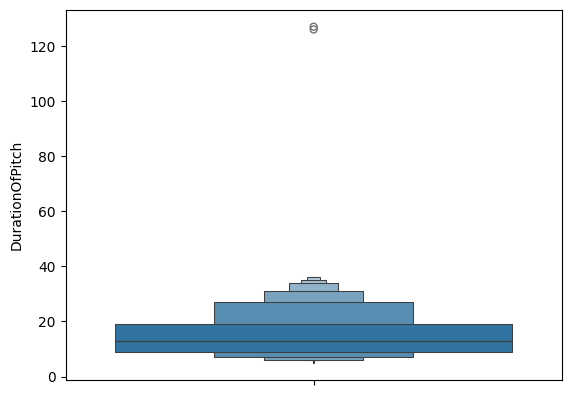

In [25]:
# grafik untuk distribusi kolom Duration Of Pitch sebelum dilakukan handling outlier
sns.boxenplot(y=df['DurationOfPitch'])

Berdasarkan grafik diatas terlihat bahwa untuk kolom 'durationofpitch' dimana memiliki outliers dimana terlihat data yang menyimpang dibanding data yang lainnya.

<Axes: ylabel='MonthlyIncome'>

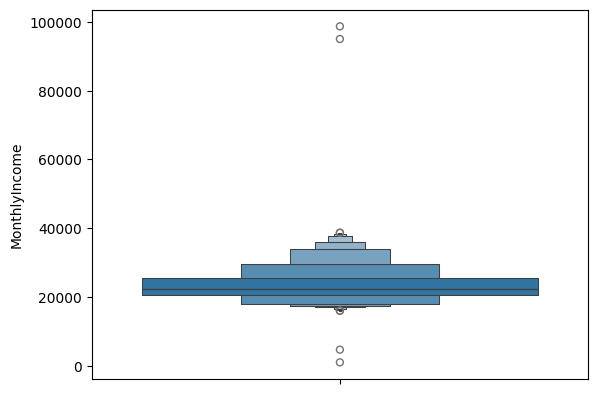

In [26]:
# grafik untuk distribusi MonthlyIncome sebelum dilakukan handling outlier
sns.boxenplot(y=df['MonthlyIncome'])

Berdasarkan grafik diatas terlihat bahwa untuk kolom 'MonthlyIncome' dimana memiliki outliers dimana terlihat data yang menyimpang dibanding data yang lainnya

<Axes: ylabel='NumberOfTrips'>

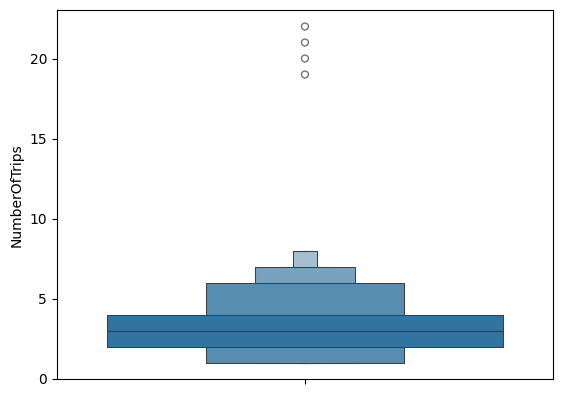

In [27]:
# grafik untuk distribusi NumberOfTrips sebelum dilakukan handling outlier
sns.boxenplot(y=df['NumberOfTrips'])

Berdasarkan grafik diatas terlihat bahwa untuk kolom 'NumberOfTrips' dimana memiliki outliers dimana terlihat data yang menyimpang dibanding data yang lainnya

In [28]:
# handling outliers dengan menggunakan IQR

def outlier_handler(df, col):

    """
    Utility function to clean outlier using Tukey Fences Method.
    :param df: Dataframe with outlier (pd.DataFrame)
    :param col: Numerical Feature (String)
    :return: Dataframe without outlier (pd.DataFrame)
    """

    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    up_bound = q3 + 1.5*iqr
    low_bound = q1 - 1.5*iqr
    outlier = df[col][(df[col] < low_bound) | (df[col] > up_bound)]
    print(f'Percentage of outliers: {len(outlier)*100/len(df[col]):.2f}%')
    no_outlier = df[(df[col] >= low_bound) & (df[col] <= up_bound)]
    return no_outlier

In [29]:
data_clean = df.copy()
data_clean = outlier_handler(data_clean, col='DurationOfPitch')
data_clean = outlier_handler(data_clean, col='NumberOfTrips')
data_clean = outlier_handler(data_clean, col='MonthlyIncome')

Percentage of outliers: 2.28%
Percentage of outliers: 2.28%
Percentage of outliers: 7.72%


<Axes: ylabel='DurationOfPitch'>

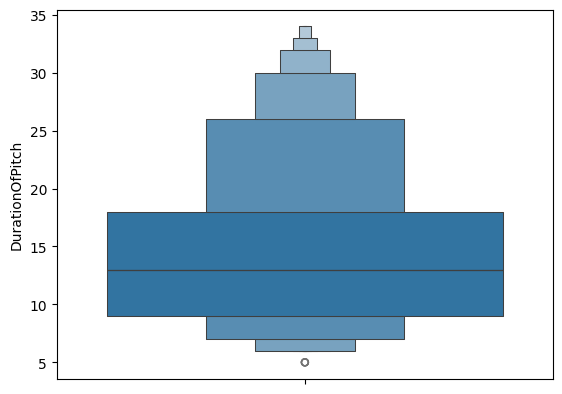

In [30]:
# grafik distribusi kolom durationofpitch setelah dilakukan handling outliers
sns.boxenplot(y=data_clean['DurationOfPitch'])

Berdasarkan grafik diatas terlihat bahwa untuk kolom 'DurationOfPitch'sudah tidak memiliki outliers.

<Axes: ylabel='MonthlyIncome'>

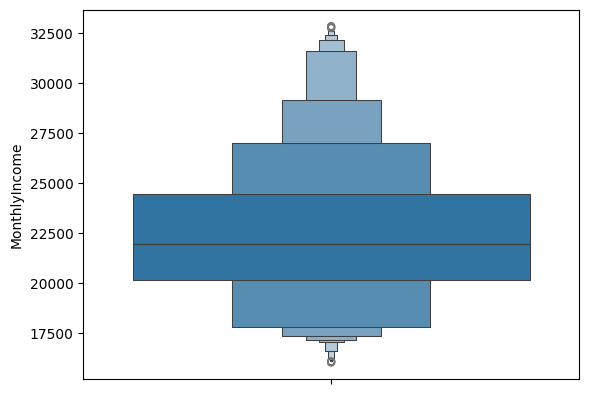

In [31]:
# grafik distribusi kolom MonthlyIncome setelah dilakukan handling outliers
sns.boxenplot(y=data_clean['MonthlyIncome'])

Berdasarkan grafik diatas terlihat bahwa untuk kolom 'MonthlyIncome' sudah tidak memiliki outliers.

<Axes: ylabel='NumberOfTrips'>

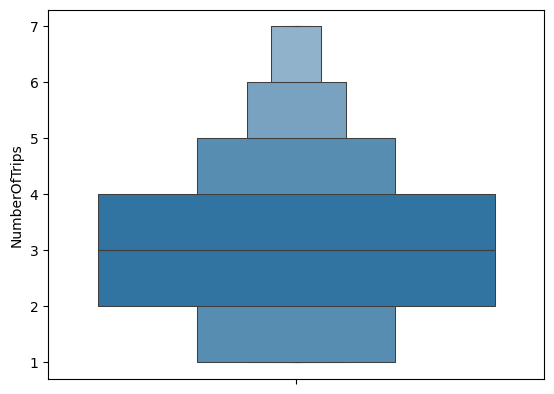

In [32]:
# grafik distribusi kolom NumberOfTrips setelah dilakukan handling outliers
sns.boxenplot(y=data_clean['NumberOfTrips'])

Berdasarkan grafik diatas terlihat bahwa untuk kolom 'NumbersOfTrips' sudah tidak memiliki outliers.

### D. Feature Transformation

In [33]:
from sklearn.preprocessing import StandardScaler

for i in nums:
    df[i] = StandardScaler().fit_transform(df[i].values.reshape(len(df), 1))

In [34]:
df[nums].describe()

,NumberOfPersonVisiting,NumberOfFollowups,NumberOfTrips,PitchSatisfactionScore,NumberOfChildrenVisiting,Age,DurationOfPitch,MonthlyIncome
count,4.747000e+03,4.747000e+03,4.747000e+03,4.747000e+03,4747.000000,4.747000e+03,4.747000e+03,4.747000e+03
mean,2.873904e-16,-9.579679e-17,9.579679e-17,8.382219e-17,0.000000,-3.293015e-17,5.388569e-17,7.184759e-17
std,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105,1.000105e+00,1.000105e+00,1.000105e+00
min,-2.640647e+00,-2.696270e+00,-1.222645e+00,-1.498140e+00,-1.392756,-2.132549e+00,-1.246320e+00,-4.283254e+00
25%,-1.259363e+00,-7.047975e-01,-6.735018e-01,-7.679139e-01,-0.223422,-7.085036e-01,-7.660828e-01,-5.830277e-01
50%,1.219208e-01,2.909387e-01,-1.243584e-01,-3.768808e-02,-0.223422,-1.607938e-01,-2.858458e-01,-2.272458e-01
75%,1.219208e-01,2.909387e-01,4.247850e-01,6.925377e-01,0.945911,6.059998e-01,4.345098e-01,3.507453e-01
max,2.884489e+00,2.282411e+00,1.030937e+01,1.422763e+00,2.115245,2.577755e+00,1.340091e+01,1.427592e+01


### E. Feature Encoding

In [35]:
df_cat = df[cats].astype('str')
df_cat.describe().T

,count,unique,top,freq
Occupation,4747,4,Salaried,2293
Gender,4747,2,Male,2835
TypeofContact,4747,2,Self Enquiry,3375
MaritalStatus,4747,3,Married,2279
Passport,4747,2,0,3372
OwnCar,4747,2,1,2932
ProductPitched,4747,5,Basic,1800
CityTier,4747,3,1,3098
PreferredPropertyStar,4747,3,3.0,2931
Designation,4747,5,Executive,1800


- Fitur `ProductPitched`, `CityTier`, `PreferredPropertyStar`, `Designation` merupakan nilai kategorik yang memiliki urutan dan akan dilakukan **Ordinal encoding**, selain fitur-fitur ini nilainya bersifat **Nominal** atau tidak memiliki urutan.
- Untuk fitur kategorik **Nominal** akan dilakukan ***one hot encoding*** dengan catatan jika dalam

In [36]:
productPitched_mapping = {'Deluxe': 0,
                          'Basic': 1,
                          'Standard':2,
                          'Super Deluxe':3,
                          'King': 4
}

designation_mapping = {'Manager': 0,
                       'Senior Manager':1,
                       'AVP':2,
                       'VP': 3,
                       'Executive': 4}

In [37]:
df['ProductPitched'] = df['ProductPitched'].map(productPitched_mapping)
df['Designation'] = df['Designation'].map(designation_mapping)

In [38]:
df[cats].sample(5)

,Occupation,Gender,TypeofContact,MaritalStatus,Passport,OwnCar,ProductPitched,CityTier,PreferredPropertyStar,Designation
1168,Large Business,Female,Company Invited,Unmarried,1,1,1,1,3.0,4
1294,Salaried,Male,Self Enquiry,Unmarried,0,1,0,1,4.0,0
3563,Salaried,Male,Self Enquiry,Married,0,1,0,3,4.0,0
3434,Salaried,Male,Company Invited,Divorced,0,1,0,3,3.0,0
1246,Salaried,Female,Company Invited,Married,0,1,1,2,3.0,4


In [39]:
df[ocat_col] = df[ocat_col].astype('int')

In [40]:
df_copy = df.copy()

In [41]:
for i in ncat_col:
    onehots = pd.get_dummies(df[i], prefix=i)
    df = df.join(onehots)

In [42]:
df = df.drop(columns=ncat_col)

In [43]:
df

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,PitchSatisfactionScore,...,Gender_Male,TypeofContact_Company Invited,TypeofContact_Self Enquiry,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Unmarried,Passport_0,Passport_1,OwnCar_0,OwnCar_1
0,1,0.386916,3,-1.126261,0.121921,-0.704798,0,3,-1.222645,-0.767914,...,False,False,True,False,False,True,False,True,False,True
1,0,1.263251,1,-0.165786,0.121921,0.290939,0,4,-0.673502,-0.037688,...,True,True,False,True,False,False,True,False,False,True
2,1,-0.051252,1,-0.886142,0.121921,0.290939,1,3,2.072215,-0.037688,...,True,False,True,False,False,True,False,True,True,False
3,0,-0.489420,1,-0.766083,-1.259363,-0.704798,1,3,-0.673502,1.422763,...,False,True,False,True,False,False,False,True,False,True
4,0,-0.270336,1,-0.886142,-1.259363,-0.704798,1,4,-1.222645,1.422763,...,True,False,True,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,1.263251,3,-0.766083,0.121921,1.286675,0,4,-0.673502,-1.498140,...,True,False,True,False,False,True,False,True,False,True
4884,1,-1.037129,1,1.875221,1.503205,1.286675,1,3,-0.124358,-0.037688,...,True,True,False,False,False,True,False,True,False,True
4885,1,1.591877,3,0.194391,1.503205,0.290939,2,4,2.072215,-1.498140,...,False,False,True,False,True,False,True,False,False,True
4886,1,-2.023007,3,0.074332,0.121921,0.290939,1,3,-0.124358,1.422763,...,True,False,True,False,False,True,True,False,True,False


List Feature pada dataset setelah dilakukan **Encoding**, terdapat penambahan:
- 'Occupation_Free Lancer',
- 'Occupation_Large Business',
- 'Occupation_Salaried',
- 'Occupation_Small Business',
- 'Gender_Female',
- 'Gender_Male',
- 'TypeofContact_Company Invited',
- 'TypeofContact_Self Enquiry',
- 'MaritalStatus_Divorced',
- 'MaritalStatus_Married',
- 'MaritalStatus_Unmarried',
- 'Passport_0',
- 'Passport_1',
- 'OwnCar_0',
- 'OwnCar_1'

In [44]:
df.columns

Index(['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched',
       'PreferredPropertyStar', 'NumberOfTrips', 'PitchSatisfactionScore',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome',
       'Occupation_Free Lancer', 'Occupation_Large Business',
       'Occupation_Salaried', 'Occupation_Small Business', 'Gender_Female',
       'Gender_Male', 'TypeofContact_Company Invited',
       'TypeofContact_Self Enquiry', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Unmarried', 'Passport_0',
       'Passport_1', 'OwnCar_0', 'OwnCar_1'],
      dtype='object')

handling class imbalance dilakukan dengan menggunakan SMOTE (Synthetic Minority Over-sampling Technique)


### F. Class Imbalance

In [45]:
df['ProdTaken'].value_counts()

,count
ProdTaken,
0,3853
1,894


## 2. Feature Engineering

### A. Feature Selection[link text](https://)

In [46]:
from imblearn.over_sampling import SMOTE

# memisahkan fitur dan label

X = df.drop('ProdTaken', axis = 1)
y = df['ProdTaken']

# initialize SMOTE
smote = SMOTE(random_state=42)

# melakukan oversampling
X_res, y_res = smote.fit_resample(X,y)

# Print distribusi kelas setelah dilakukan oversampling
print(y_res.value_counts())

ProdTaken
1    3853
0    3853
Name: count, dtype: int64


In [47]:
##Feature Extraction Requirements
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import f_classif

In [48]:
X = df_copy.iloc[:,1:].copy()
y = df_copy.iloc[:,0].copy()

In [49]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,0.386916,Self Enquiry,3,-1.126261,Salaried,Female,0.121921,-0.704798,0,3,Unmarried,-1.222645,1,-0.767914,1,-1.392756,0,-0.484511
1,1.263251,Company Invited,1,-0.165786,Salaried,Male,0.121921,0.290939,0,4,Divorced,-0.673502,0,-0.037688,1,0.945911,0,-0.648484
2,-0.051252,Self Enquiry,1,-0.886142,Free Lancer,Male,0.121921,0.290939,1,3,Unmarried,2.072215,1,-0.037688,0,-1.392756,4,-1.226095
3,-0.489420,Company Invited,1,-0.766083,Salaried,Female,-1.259363,-0.704798,1,3,Divorced,-0.673502,1,1.422763,1,-0.223422,4,-1.070482
4,-0.270336,Self Enquiry,1,-0.886142,Small Business,Male,-1.259363,-0.704798,1,4,Divorced,-1.222645,0,1.422763,1,-1.392756,4,-0.964270


In [50]:
#Encoding
#columns for Encoding
coded_col = ['Occupation','MaritalStatus','TypeofContact','Gender']
#create encoder object
encoder = OrdinalEncoder(categories=[['Salaried', 'Free Lancer','Small Business','Large Business'],
                                ['Unmarried','Married','Divorced'],
                                ['Self Enquiry', 'Company Invited'],
                                ['Male', 'Female']])

X_code = encoder.fit_transform(X[coded_col])
X[coded_col] = X_code

In [51]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,0.386916,0.0,3,-1.126261,0.0,1.0,0.121921,-0.704798,0,3,0.0,-1.222645,1,-0.767914,1,-1.392756,0,-0.484511
1,1.263251,1.0,1,-0.165786,0.0,0.0,0.121921,0.290939,0,4,2.0,-0.673502,0,-0.037688,1,0.945911,0,-0.648484
2,-0.051252,0.0,1,-0.886142,1.0,0.0,0.121921,0.290939,1,3,0.0,2.072215,1,-0.037688,0,-1.392756,4,-1.226095
3,-0.489420,1.0,1,-0.766083,0.0,1.0,-1.259363,-0.704798,1,3,2.0,-0.673502,1,1.422763,1,-0.223422,4,-1.070482
4,-0.270336,0.0,1,-0.886142,2.0,0.0,-1.259363,-0.704798,1,4,2.0,-1.222645,0,1.422763,1,-1.392756,4,-0.964270


In [52]:
#seleksi feature dengan fungsi f_classif
f_stat, p_stat = f_classif(X,y)

Xc = X.columns
treshold = 0.05

#save results in Pandas DataFrame
results = pd.DataFrame(np.concatenate([np.array(Xc).reshape(-1,1),
                                       f_stat.reshape(-1,1),
                                       p_stat.reshape(-1,1)], axis=1),
                       columns=['features','f_stat','p_stat'])

results.loc[:,'features'] = results.loc[:,'features'].apply(lambda x: x.split('__')[-1])

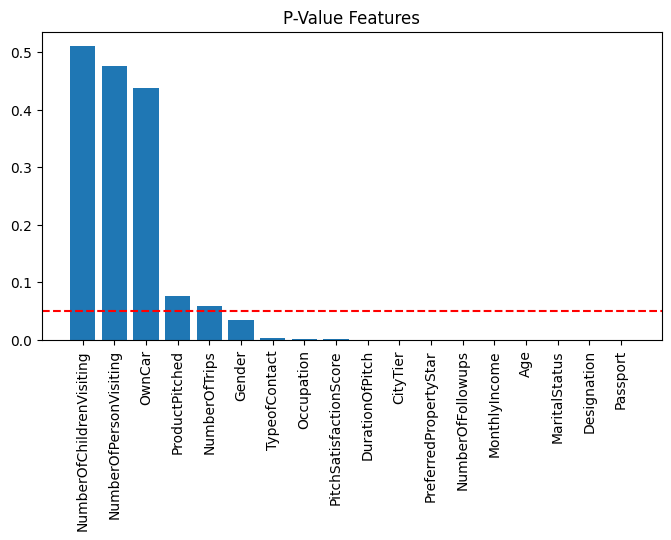

In [53]:
f, x = plt.subplots(1,1, figsize=(8,4))

results.sort_values(by='p_stat', ascending=False, inplace=True)

plt.bar(results.features, results.p_stat, axes=x)
x.axhline(treshold, ls='--', c='r')
plt.xticks(rotation=90)
plt.title("P-Value Features")
plt.show();

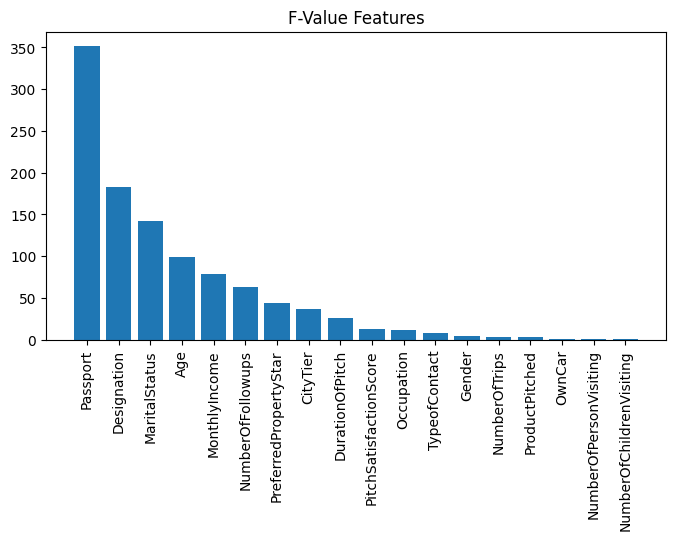

In [54]:
f, x = plt.subplots(1,1, figsize=(8,4))

results.sort_values(by='f_stat', ascending=False, inplace=True)

plt.bar(results.features, results.f_stat, axes=x)

plt.title("F-Value Features")
plt.xticks(rotation=90)
plt.show();

**Results:** berdasarkan hasil analisa, didapatkan hasil sebagai berikut:

Feature yang dibuang (karena p_value > treshold dan F_score rendah):
1. Number of Children Visiting
2. Number of Person Visiting
3. OwnCar
4. Number of Trips
5. Product Pitched
6. Occupation
7. Gender
8. Type Of Contact (tidak di buang sebenarnya, namun Type of Contact adalah parameter yg akan digunakan untuk menentukan keberhasilan campaign)

Feature yang digunakan:
1. Passport
2. Marital Status
3. Age
4. Monthly Income
5. Number of Followups
6. Number of Property Star
7. City Tier
8. Duration Of Pitch
9. Pitch Satisfaction Score



### B. Feature Extraction

Tidak melakukan feature extraction karena feature-feature yang sudah diselection sudah cukup relevan dalam analisisnya.
Tambahan feature yang mungkin relevan untuk dataset diatas:
- Fitur Kategorikal Interaksi
- Fitur Skor Kesejahteraan Finansial
- Fitur Durasi Kontak dalam Jam
- Fitur Kategorikal Berdasarkan Status Pernikahan dan Jumlah Anak

### C. Rekomendasi 4 feature tambahan
1. Fitur Kategorikal Interaksi
       Contoh: Age_Category_TypeofContact
Fitur ini hasil interaksi antara kategori umur dan jenis kontak dengan mengelompokkan umur ke dalam kategori. Seperti "18-30", "31-45", "46-60", dan "60+" untuk melihat interaksi antara kelompok umur dan jenis kontak (misalnya, telepon vs. email) mempengaruhi keputusan untuk membeli produk.

2. Fitur Skor Kesejahteraan Finansial
       Contoh: IncomePerChild
Fitur ini dapat memberikan wawasan tentang kesejahteraan finansial relatif pelanggan yang mempengaruhi keputusan perjalanan atau pengeluaran.

3. Fitur Durasi Kontak dalam Jam
       Contoh: DurationOfPitchInHours
Fitur dengan mengubah DurationOfPitch dari menit ke jam dengan membaginya 60 (DurationOfPitch / 60) , tujuannya untuk melihat hubungan antara durasi pitch dan keputusan pembelian.

4. Fitur Kategorikal Berdasarkan Status Pernikahan dan Jumlah Anak
       Contoh: MaritalStatus_ChildrenInteraction
Fitur berdasarkan interaksi antara status pernikahan (MaritalStatus) dan jumlah anak yang dikunjungi (NumberOfChildrenVisiting). Fitur ini  berupa kombinasi status pernikahan dengan rentang jumlah anak, yang dapat memberikan informasi tambahan tentang bagaimana struktur keluarga mempengaruhi keputusan membeli produk.


# Final Results

berdasarkan hasil analisa, didapatkan hasil akhir Data sebagai berikut: